In [1]:
# the fun bit, looking at the data, making visualizations, finding longest/shortest words by travel distance
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('word_distances.csv', keep_default_na = False)
layouts = ['qwerty', 'dvorak', 'colemak', 'workman']
layouts_home = [ly + '_home' for ly in layouts]
measures = ['dist', 'dpl', 'dpj']
print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  
0        100.00        100.00  
1        100.00        100.00  
2         66.67        100.00  
3         60.00         80.00  
4         66.67         83.33  


In [2]:
df_a = df.melt(id_vars = ['words', 'length'], value_vars = layouts, var_name = 'layouts', value_name = 'dist')
df_b = df.melt(id_vars = ['words', 'length'], value_vars = layouts_home, var_name = 'layouts', value_name = 'home')
df_b['layouts'] = df_b['layouts'].str.replace('_home', '')
df_merged = pd.merge(df_a, df_b, on = ['words', 'length', 'layouts'])
print(df_merged.head())

    words  length layouts    dist    home
0      AA       2  qwerty    0.00  100.00
1     AAA       3  qwerty    0.00  100.00
2     AAH       3  qwerty   95.25   66.67
3   AAHED       5  qwerty  179.67   60.00
4  AAHING       6  qwerty  212.92   33.33


In [3]:
#distance per letter for each word
df_merged['dpl'] = round(df_merged['dist'] / df_merged['length'], 3)

#distance per jump for each word
df_merged['dpj'] = round(df_merged['dist'] / (df_merged['length']-1), 3)

print(df_merged.head())

    words  length layouts    dist    home     dpl     dpj
0      AA       2  qwerty    0.00  100.00   0.000   0.000
1     AAA       3  qwerty    0.00  100.00   0.000   0.000
2     AAH       3  qwerty   95.25   66.67  31.750  47.625
3   AAHED       5  qwerty  179.67   60.00  35.934  44.918
4  AAHING       6  qwerty  212.92   33.33  35.487  42.584


In [4]:
df_merged = df_merged[df_merged['dist'] > 0]
print(df_merged.head())

    words  length layouts    dist    home     dpl     dpj
2     AAH       3  qwerty   95.25   66.67  31.750  47.625
3   AAHED       5  qwerty  179.67   60.00  35.934  44.918
4  AAHING       6  qwerty  212.92   33.33  35.487  42.584
5    AAHS       4  qwerty  171.45   75.00  42.862  57.150
6     AAL       3  qwerty  152.40  100.00  50.800  76.200


In [ ]:
'''CALCULATE LONGEST AND SHORTEST WORDS'''

In [64]:
#get top 20 for particular measure and save to csv
def analysis(layout):
    df_output = pd.DataFrame()
    df_subset = df_merged[df_merged['layouts']==layout]
    for meas in measures:
        df_subset.sort_values(by=meas, inplace = True, ascending = False)
        df_add = df_subset.head(20)
        df_add['meas'] = meas
        df_output = df_output.append(df_add, ignore_index = True)
    filename = 'longest_' + layout + '.csv'
    df_output.to_csv(filename, index = False)

In [65]:
def shortest(layout):
    df_output = pd.DataFrame()
    df_subset = df_merged[df_merged['layouts'] == layout]
    for i in range(3, 11):
        df_len = df_subset[df_subset['length'] == i]
        df_len.sort_values(by = 'dist', inplace = True, ascending = True)
        df_add = df_len.head(15)
        df_output = df_output.append(df_add, ignore_index = True)
    filename = 'shortest_' + layout + '.csv'
    df_output.to_csv(filename, index = False)

In [66]:
for ly in layouts:
    analysis(ly)
    shortest(ly)

In [ ]:
'''VISUALIZATIONS'''

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('colorblind')
sns.set_style('whitegrid')

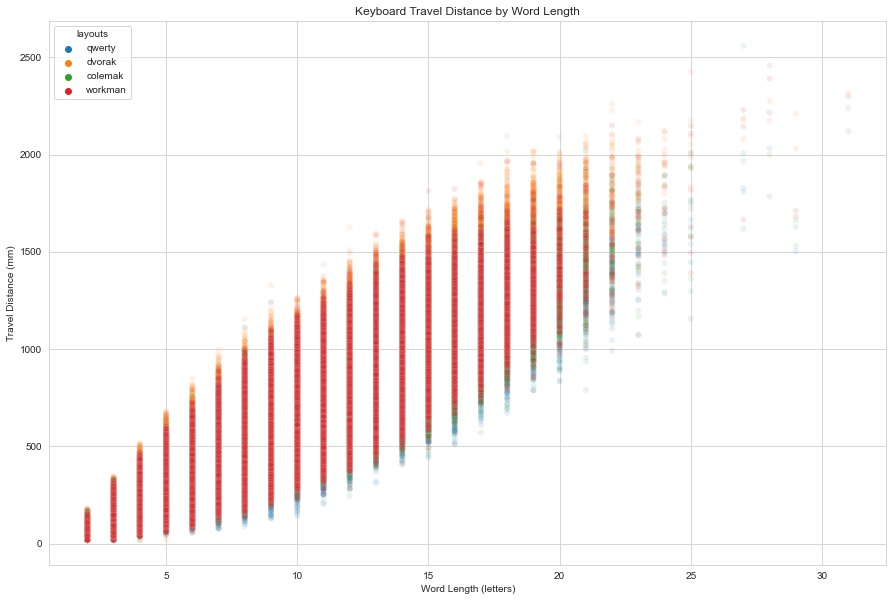

In [20]:
fig, ax = plt.subplots(figsize = (15,10))

sns.scatterplot(x='length', y='dist', data = df_merged, hue = 'layouts', alpha = 0.1, ax = ax)

plt.xlabel('Word Length (letters)')
plt.ylabel('Travel Distance (mm)')

plt.title('Keyboard Travel Distance by Word Length')
plt.savefig('scatter.png')
plt.show()

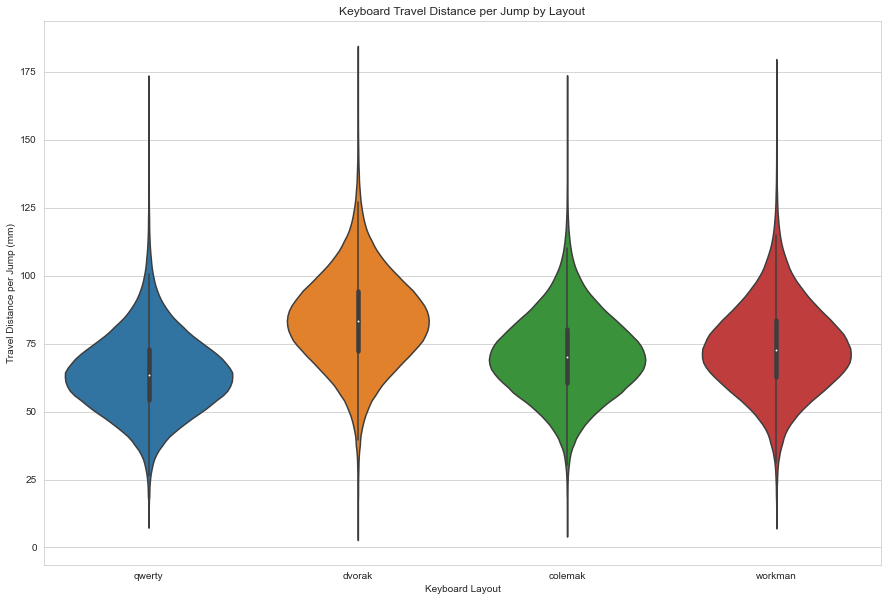

In [11]:
fig, ax = plt.subplots(figsize = (15,10))

sns.violinplot(x = 'layouts', y = 'dpj', data = df_merged)

plt.xlabel('Keyboard Layout')
plt.ylabel('Travel Distance per Jump (mm)')

plt.title('Keyboard Travel Distance per Jump by Layout')
plt.savefig('violin.png')
plt.show()

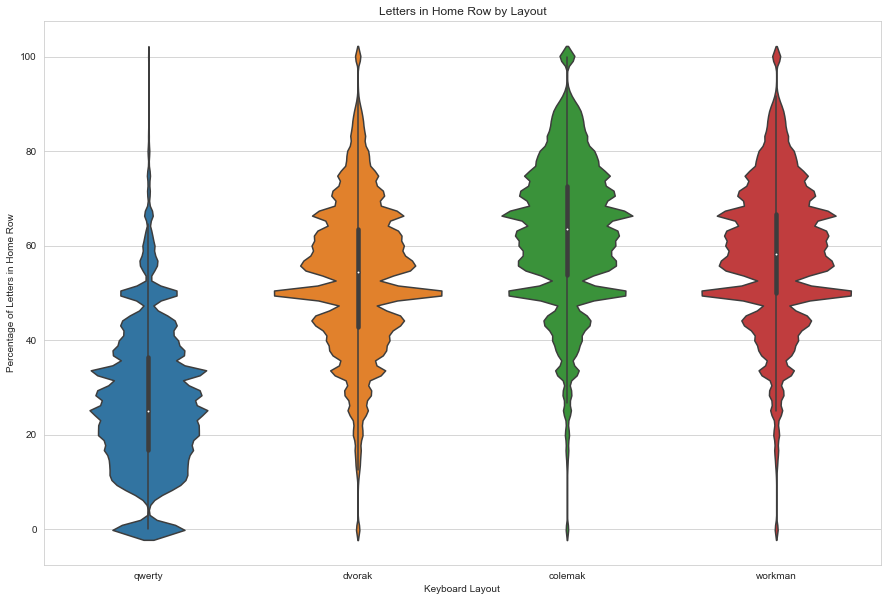

In [22]:
fig, ax = plt.subplots(figsize = (15,10))

sns.violinplot(x='layouts', y='home', data = df_merged, ax = ax)

plt.xlabel('Keyboard Layout')
plt.ylabel('Percentage of Letters in Home Row')

plt.title('Letters in Home Row by Layout')
plt.savefig('violin_home.png')
plt.show()

In [ ]:
'''SUMMARY STATISTICS'''

In [5]:
df_merged['jumps'] = df_merged['length'] - 1
print(df_merged.head())

    words  length layouts    dist    home     dpl     dpj  jumps
2     AAH       3  qwerty   95.25   66.67  31.750  47.625      2
3   AAHED       5  qwerty  179.67   60.00  35.934  44.918      4
4  AAHING       6  qwerty  212.92   33.33  35.487  42.584      5
5    AAHS       4  qwerty  171.45   75.00  42.862  57.150      3
6     AAL       3  qwerty  152.40  100.00  50.800  76.200      2


In [6]:
def w_avg(df, weight, val):
    weightedavg = (df[val] * df[weight]).sum() / df[weight].sum()
    return weightedavg

In [7]:
for ly in layouts:
    df_ly = df_merged[df_merged['layouts'] == ly]
    print(ly)
    print('avg dist: ', df_ly['dist'].mean())
    print('avg dpj: ', w_avg(df_ly, 'jumps', 'dpj'))
    print('avg home: ', w_avg(df_ly, 'length', 'home'))
    print()

qwerty
avg dist:  540.4714126936518
avg dpj:  64.01084724261169
avg home:  26.487810891459695

dvorak
avg dist:  707.0775861686918
avg dpj:  83.74288696905079
avg home:  53.80563666003935

colemak
avg dist:  597.5427308888583
avg dpj:  70.77010071885114
avg home:  63.400189825640965

workman
avg dist:  622.0925601863487
avg dpj:  73.67766584735368
avg home:  58.99978644078855

